0


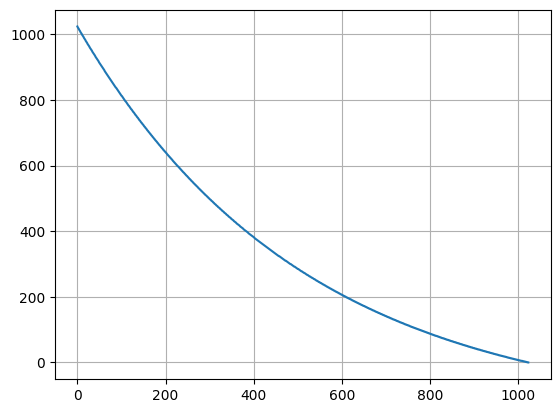

#pragma once
#include <Arduino.h>
const uint16_t decayCurveSize = 1024; 
const uint16_t decayCurve[1024] = {
1024,1021,1019,1017,1014,1012,1010,1007,1005,1003,1001,998,996,994,992,989,
987,985,983,980,978,976,974,971,969,967,965,963,960,958,956,954,
952,950,947,945,943,941,939,937,935,932,930,928,926,924,922,920,
918,915,913,911,909,907,905,903,901,899,897,895,893,891,888,886,
884,882,880,878,876,874,872,870,868,866,864,862,860,858,856,854,
852,850,848,846,844,842,840,838,837,835,833,831,829,827,825,823,
821,819,817,815,813,812,810,808,806,804,802,800,798,796,795,793,
791,789,787,785,783,782,780,778,776,774,772,771,769,767,765,763,
762,760,758,756,754,753,751,749,747,746,744,742,740,738,737,735,
733,731,730,728,726,725,723,721,719,718,716,714,713,711,709,707,
706,704,702,701,699,697,696,694,692,691,689,687,686,684,682,681,
679,677,676,674,673,671,669,668,666,664,663,661,660,658,656,655,
653,652,650,648,647,645,644,642,641,639,638,636,634,633,631,630,
628,627,625,624,622,621,619,618,616

In [8]:
import os
import numpy as np
import pprint
import matplotlib.pyplot as plt
import math

# decay
_maxLevel = 1024
_sustain = -160
_decay = 1024
_curve = 2
data = []
for i in range(_decay):
    _level = int((math.exp(-1 * i * (_curve / _decay)) * (_maxLevel - _sustain)) + _sustain)
    data.append(_level)
print(data[-1])
plt.plot(data)
plt.grid(True)
plt.show()

# 16個ずつ改行するのに変換
c_array = []
for i in range(0, len(data), 16):
    c_array.append(",".join(map(str, data[i:i+16])))


filename = 'decayCurve'
txt = '#pragma once\n'
txt += '#include <Arduino.h>\n'
txt += f'const uint16_t {filename}Size = {_decay}; \n'
txt += f'const uint16_t {filename}[{_decay}] = ' + '{\n'
txt += ',\n'.join(c_array)
txt += '};\n'
# with open(f"{filename}.h", "w") as f:
#     f.write(txt)

print(txt)
